# **Import Library**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load Dataset**

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset of Diabetes.csv to Dataset of Diabetes.csv


In [ ]:
df = pd.read_csv("Dataset of Diabetes.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# **Data Cleaning**

---

In [ ]:
df.drop(columns=["ID","No_Pation"], inplace=True)

In [ ]:
df['CLASS'] = df['CLASS'].str.strip().str.upper()

In [ ]:
df["Gender"] = df["Gender"].str.strip().str.upper()

In [ ]:
df["Gender"] = df["Gender"].replace({"M": 0, "F": 1})

/tmp/ipython-input-19-1259667555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"M": 0, "F": 1})


In [ ]:
df["CLASS"] = df["CLASS"].astype("category")

In [ ]:
df['CLASS_CODE'] = df['CLASS'].cat.codes  # CLASS: N=0, P=1, Y=2

# **Exploratory Data Analysis (EDA)**

---

### Distribusi Kelas Diabetes

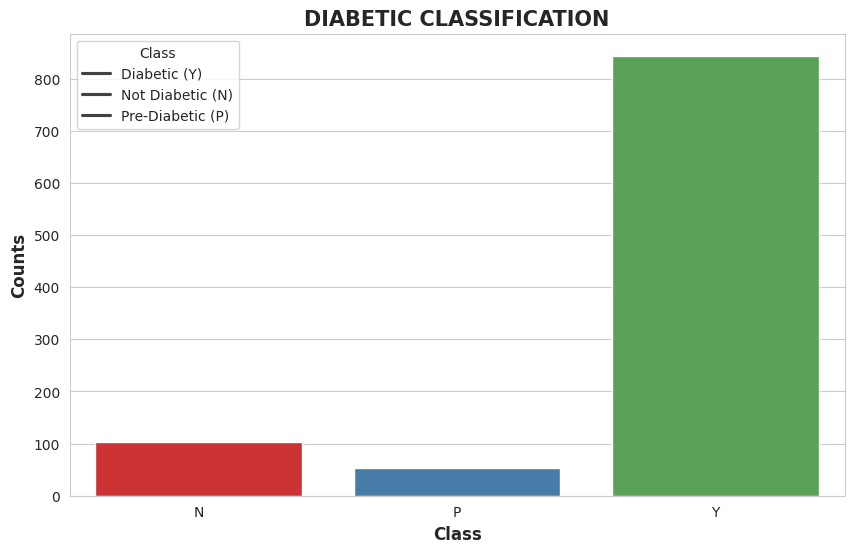

In [ ]:
classifi_diabetic = df["CLASS"].value_counts().reset_index()
classifi_diabetic.columns = ['CLASS', 'count']

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_diabetic, x="CLASS", y="count", hue="CLASS", palette="Set1")
plt.xlabel("Class", fontweight="bold", fontsize=12)
plt.ylabel("Counts", fontweight="bold", fontsize=12)
plt.title("DIABETIC CLASSIFICATION", fontweight="bold", fontsize=15)
plt.legend(title="Class", labels=["Diabetic (Y)", "Not Diabetic (N)", "Pre-Diabetic (P)"])
plt.show()

In [ ]:
print(df['CLASS'].value_counts())

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


### Perbandingan Laporan Kesehatan Berdasarkan Gender

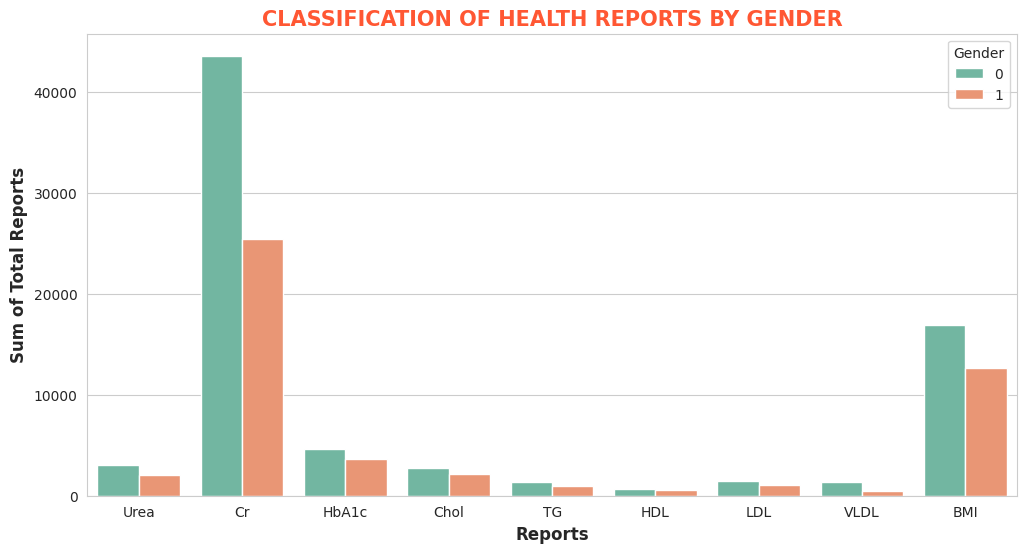

In [ ]:
repo_classifi = df.groupby("Gender")[[ 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']].sum().reset_index()
repo_melted = repo_classifi.melt(id_vars="Gender", var_name="Reports", value_name="sum")

plt.figure(figsize=(12,6))
sns.barplot(data=repo_melted, x="Reports", y="sum", hue="Gender", palette="Set2")
plt.xlabel("Reports", fontweight="bold", fontsize=12)
plt.ylabel("Sum of Total Reports", fontweight="bold", fontsize=12)
plt.title("CLASSIFICATION OF HEALTH REPORTS BY GENDER", fontweight="bold", fontsize=15, color="#FF5733")
plt.show()

### Heatmap Korelasi Berdasarkan Gender

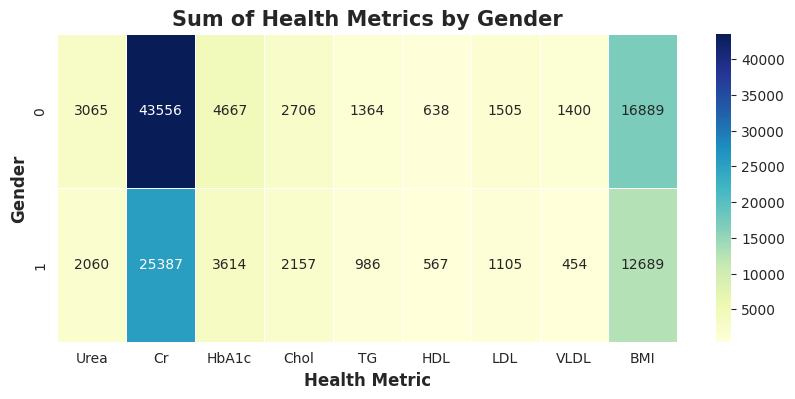

In [ ]:
repo_classifi.set_index("Gender", inplace=True)

plt.figure(figsize=(10, 4))
sns.heatmap(repo_classifi, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Sum of Health Metrics by Gender", fontweight="bold", fontsize=15)
plt.xlabel("Health Metric", fontweight="bold", fontsize=12)
plt.ylabel("Gender", fontweight="bold", fontsize=12)
plt.show()

# **Data Preprocessing**

---



Feature Selection and Target Variable

In [ ]:
x = df.drop(columns=["CLASS", "CLASS_CODE"])
y = df["CLASS_CODE"]

Feature Scaling

In [ ]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)

Train-Test Split

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# **Model Training**

---


=== Classification Report (Random State = 1) ===
              precision    recall  f1-score   support

           N       0.86      0.90      0.88        21
           P       1.00      0.91      0.95        11
           Y       0.98      0.98      0.98       168

    accuracy                           0.97       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.97      0.97      0.97       200



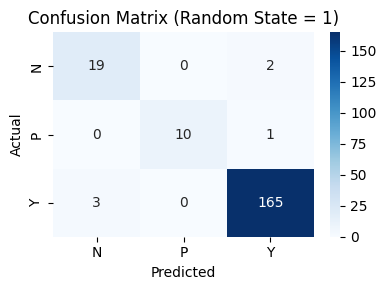


=== Classification Report (Random State = 12) ===
              precision    recall  f1-score   support

           N       0.89      0.94      0.91        17
           P       0.91      1.00      0.95        10
           Y       0.99      0.98      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.98      0.98      0.98       200



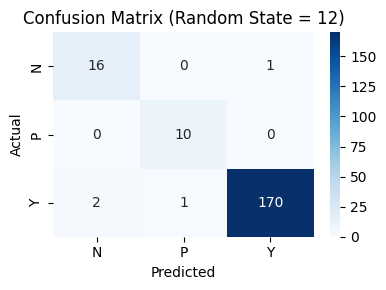


=== Classification Report (Random State = 42) ===
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



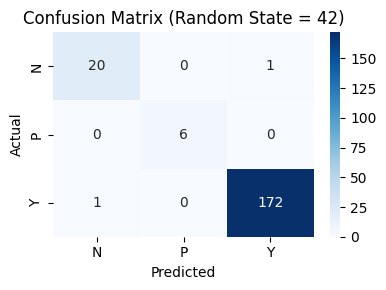


=== Classification Report (Random State = 50) ===
              precision    recall  f1-score   support

           N       0.96      1.00      0.98        23
           P       1.00      1.00      1.00         5
           Y       1.00      0.99      1.00       172

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



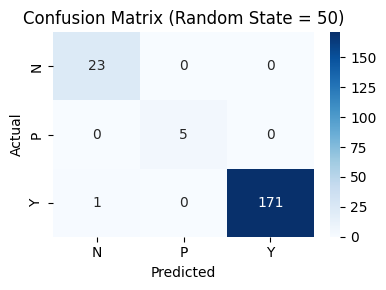


=== Classification Report (Random State = 101) ===
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        19
           P       1.00      1.00      1.00        15
           Y       1.00      1.00      1.00       166

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



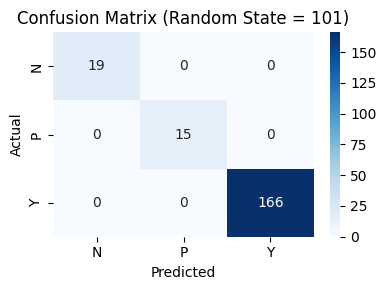


Tabel Akurasi Model (Training vs Testing):
   Random State  Train Accuracy  Test Accuracy Overfitting?
0             1             1.0          0.970           No
1            12             1.0          0.980           No
2            42             1.0          0.990           No
3            50             1.0          0.995           No
4           101             1.0          1.000           No


<Figure size 800x500 with 0 Axes>

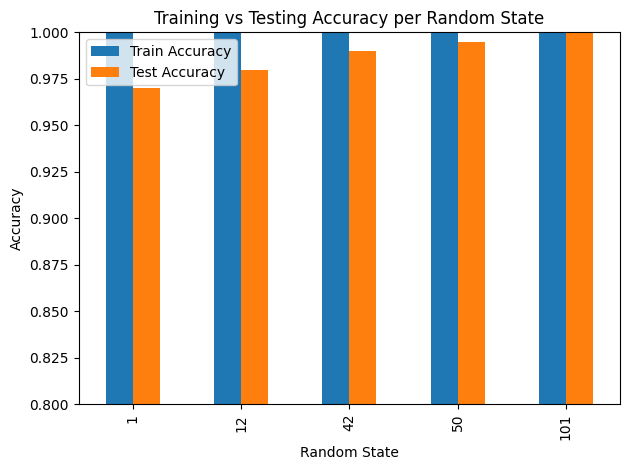

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random_states = [1, 12, 42, 50, 101]
results = []

for state in random_states:
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)

    # Model training
    model = RandomForestClassifier(random_state=state)
    model.fit(x_train, y_train)

    # Predict on training & test set
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Akurasi training & testing
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    results.append({
        'Random State': state,
        'Train Accuracy': round(acc_train, 4),
        'Test Accuracy': round(acc_test, 4),
        'Overfitting?': 'Yes' if acc_train - acc_test > 0.05 else 'No'
    })

    # Print classification report
    print(f"\n=== Classification Report (Random State = {state}) ===")
    print(classification_report(y_test, y_test_pred, target_names=df['CLASS'].cat.categories))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=df['CLASS'].cat.categories,
                yticklabels=df['CLASS'].cat.categories)
    plt.title(f"Confusion Matrix (Random State = {state})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Tabel akurasi semua random state
results_df = pd.DataFrame(results)
print("\nTabel Akurasi Model (Training vs Testing):")
print(results_df)

# Plot akurasi training vs testing
plt.figure(figsize=(8, 5))
results_df.plot(x='Random State', y=['Train Accuracy', 'Test Accuracy'], kind='bar')
plt.title("Training vs Testing Accuracy per Random State")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


=== Classification Report (Random State = 1) ===
              precision    recall  f1-score   support

           N       0.79      0.90      0.84        21
           P       1.00      0.91      0.95        11
           Y       0.98      0.97      0.98       168

    accuracy                           0.96       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.96      0.96      0.96       200



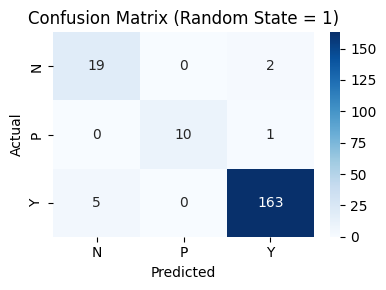


=== Classification Report (Random State = 12) ===
              precision    recall  f1-score   support

           N       0.89      0.94      0.91        17
           P       0.91      1.00      0.95        10
           Y       0.99      0.98      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.98      0.98      0.98       200



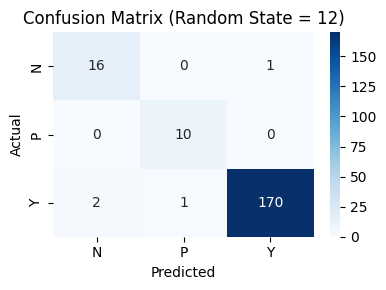


=== Classification Report (Random State = 42) ===
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



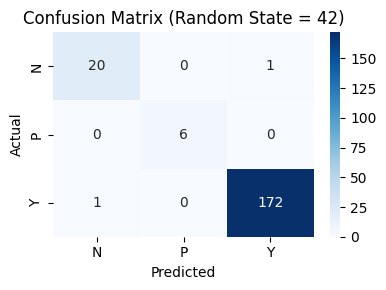


=== Classification Report (Random State = 50) ===
              precision    recall  f1-score   support

           N       0.96      1.00      0.98        23
           P       1.00      1.00      1.00         5
           Y       1.00      0.99      1.00       172

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



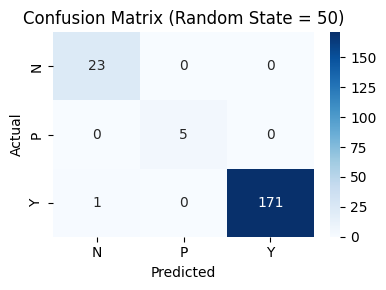


=== Classification Report (Random State = 101) ===
              precision    recall  f1-score   support

           N       0.95      1.00      0.97        19
           P       1.00      1.00      1.00        15
           Y       1.00      0.99      1.00       166

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



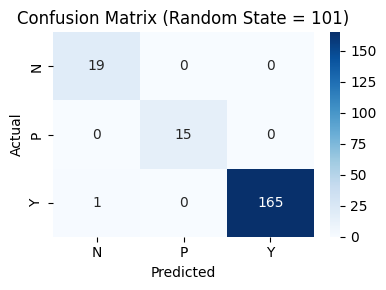


Tabel Akurasi Model:
   Random State  Accuracy
0             1     0.960
1            12     0.980
2            42     0.990
3            50     0.995
4           101     0.995


/tmp/ipython-input-13-1394998127.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Random State', y='Accuracy', palette='crest')


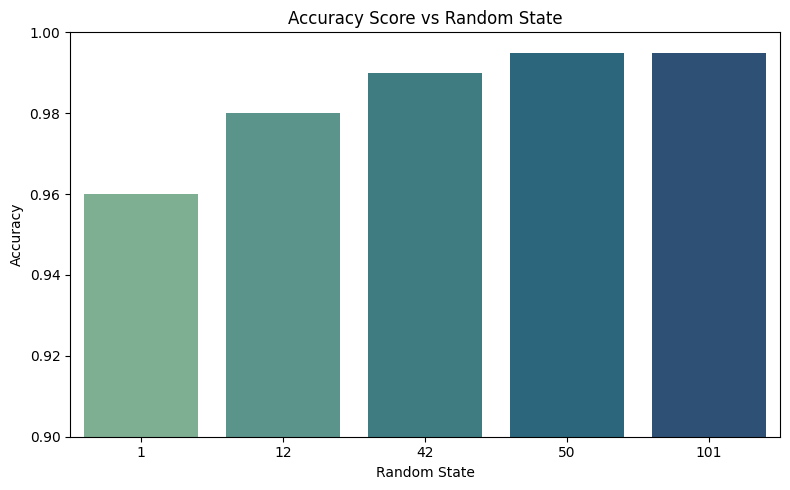

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

random_states = [1, 12, 42, 50, 101]
results = []

for state in random_states:
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)

    # Model training
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Simpan accuracy ke dalam list
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Random State': state,
        'Accuracy': round(acc, 4)
    })

    # Print classification report
    print(f"\n=== Classification Report (Random State = {state}) ===")
    print(classification_report(y_test, y_pred, target_names=df['CLASS'].cat.categories))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=df['CLASS'].cat.categories,
                yticklabels=df['CLASS'].cat.categories)
    plt.title(f"Confusion Matrix (Random State = {state})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Tabel akurasi semua random state
results_df = pd.DataFrame(results)
print("\nTabel Akurasi Model:")
print(results_df)

# Plot akurasi
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Random State', y='Accuracy', palette='crest')
plt.ylim(0.9, 1.0)
plt.title("Accuracy Score vs Random State")
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


Evaluasi Model Berdasarkan Variasi Random State:
   Random State  Accuracy  Precision  Recall  F1-Score
0             1     0.970     0.9707   0.970    0.9702
1            10     0.985     0.9851   0.985    0.9849
2            20     0.980     0.9802   0.980    0.9796
3            42     0.990     0.9900   0.990    0.9900
4           101     0.990     0.9910   0.990    0.9899


/tmp/ipython-input-32-677273086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Random State', y='Accuracy', palette='crest')


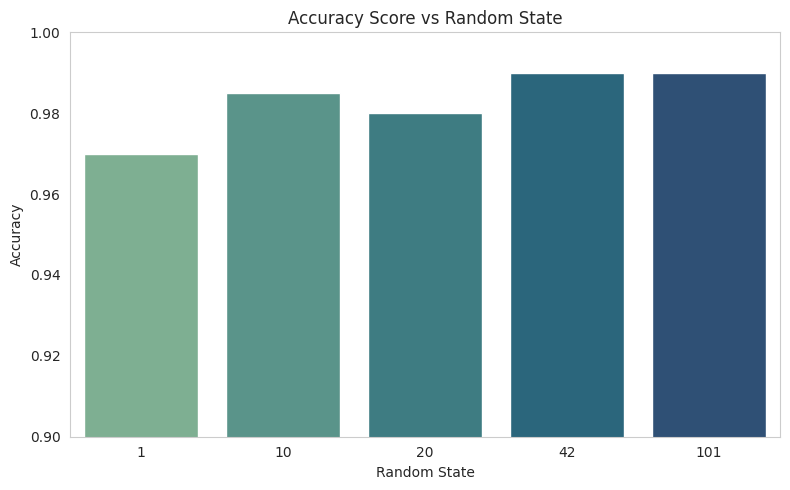

In [ ]:
results_df = pd.DataFrame(results)
print("\nEvaluasi Model Berdasarkan Variasi Random State:")
print(results_df)

# Visualisasi Akurasi
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Random State', y='Accuracy', palette='crest')
plt.ylim(0.9, 1.0)  # karena akurasi tinggi, supaya grafik lebih detail
plt.title("Accuracy Score vs Random State")
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Feature Importance Analysis**

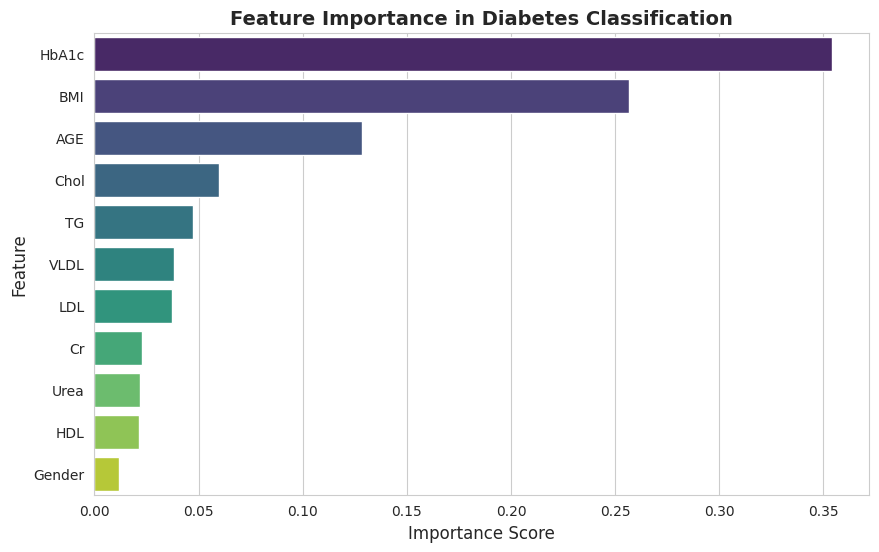

In [ ]:
importances = model.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', hue='Feature', palette='viridis')
plt.title("Feature Importance in Diabetes Classification", fontweight="bold", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()